# Optimal Decumulation:  Quarterly vs Annual Withdrawals of Retirement Savings

* There are no shortage of recommendations of means for retirees to decumulate their lifetime savings during retirement.  
* IRS's guidance, Required Minimum Distribution (RMD) tables (https://www.irs.gov/publications/p590b), is mainstream approach for annual withdrawal. 

"You cannot keep retirement funds in your account indefinitely." 
See https://www.irs.gov/retirement-plans/plan-participant-employee/retirement-topics-required-minimum-distributions-rmds

## Question: will quarterly withdrawal a smarter solution? 

* Get RMD data from https://www.nerdwallet.com/article/investing/social-security/required-minimum-distributions#rmd-table-2024
* How RMDs are calculated? RMD = Account balance of last year / expected years to live

## Agenda (1/24/2024):


* <font color='green'> a quick intro to analytics tool - Python packages <font>
* <font color='green'> prepare data from different resources. <font>
    

* <font color='yellow'> fit statistical distribution<font>
* <font color='yellow'>run simulation on balances and withdrawals<font>

In [ ]:
#conda install -c conda-forge pandas
pip install pandas #pypi.org

In [9]:
# import python pacakges 
import pandas as pd # dataframe manuicaption tool

In [2]:
#check the version of pandas in my computer
pd.__version__ #how to upgrade it to 2.2.0

'2.2.0'

In [3]:
pip install pandas -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 9.2 MB/s eta 0:00:000m eta 0:00:010:01:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index 0.8.55 requires SQLAlchemy[asyncio]>=1.4.49, but you have sqlalchemy 1.4.20 which is incompatible.
tensorflow-privacy 0.8.12 requires pandas~=1.4, but you have pandas 2.2.0 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# torch

In [ ]:
# open-cv

In [ ]:
pd.DataFrame(), pd.concat(), pd.merge() # 

In [3]:
#green color words in this notebook are reserved word. 
import = 1 #you can not use "import" as a variable name

SyntaxError: invalid syntax (1184734885.py, line 2)

In [13]:
import pandas
print(dir(pandas))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [14]:
import math
print(dir(math))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'cbrt', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exp', 'exp2', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'lcm', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'nextafter', 'perm', 'pi', 'pow', 'prod', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc', 'ulp']


In [18]:
tt = os.system("pwd")

/home/dada/Barn/GQ/ECON5350/Smart_retirement


In [19]:
tt

0

In [17]:
pwd #Linux command line, get the current working path

'/home/dada/Barn/GQ/ECON5350/Smart_retirement'

In [42]:
# import python pacakges 
import pandas as pd # dataframe manuicaption tool
from datetime import date
from sklearn.metrics import mean_squared_error #scikits-learn : mean((y1-y2)**2)
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import rv_continuous, burr, laplace_asymmetric, nct
from scipy.special import gamma
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pickle, time, os, sys, re, random

# imports the fitter function and produces estimated fits for our residuals
from fitter import Fitter
from pmdarima.arima import auto_arima
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt #visualization tool
from pandas.plotting import autocorrelation_plot

from statsmodels.distributions.copula.api import FrankCopula, CopulaDistribution, \
            GumbelCopula, ClaytonCopula, StudentTCopula #Copula - distributions with dependency
#https://en.wikipedia.org/wiki/Copula_(probability_theory)

from scipy import stats
import numpy as np
from tqdm import tqdm
from collections import OrderedDict

# Data Source from yahoo finance website

import yfinance as yf

    
  

In [2]:
try:
    import plotly
except:
    !pip install -U plotly

In [3]:
try:
    import kaleido
except:
    !pip install kaleido

In [4]:
import plotly
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.default_format = "svg"

In [ ]:
# let us get table from lifespan table from the weblink by copy-n-paste

In [151]:
lifetime_tbl = pd.read_clipboard(header = None)

In [152]:
lifetime_tbl.head() #not nice!

,0
0,72.0
1,27.4
2,73.0
3,26.5
4,74.0


In [155]:
rmd_tbl = pd.DataFrame(columns = ["Age", "Years"])

In [156]:
rmd_tbl

,Age,Years


In [163]:
type(lifetime_tbl[0])

pandas.core.series.Series

In [167]:
rmd_tbl.Age = list(lifetime_tbl[0][range(0, len(lifetime_tbl), 2)])
rmd_tbl.Years = list(lifetime_tbl[0][range(1, len(lifetime_tbl), 2)])

In [168]:
rmd_tbl.head()

,Age,Years
0,72.0,27.4
1,73.0,26.5
2,74.0,25.5
3,75.0,24.6
4,76.0,23.7


In [21]:
lifetime_tbl.head() #not nice!

,Age
Distribution,period
72,None
27.4,None
73,None
26.5,None


# in python or Linux, unix, variable name should follow some rules
1) do not start with number
2) do not use reserved word, e.g. "import"
3) do not use "-"
4) do not use space

In [40]:
3party = 1 #no!

SyntaxError: invalid decimal literal (1651010538.py, line 1)

In [41]:
import = 1

SyntaxError: invalid syntax (3407073972.py, line 1)

In [42]:
start-1 = 1

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (1977350619.py, line 1)

In [43]:
start end = 1

SyntaxError: invalid syntax (4292405571.py, line 1)

In [44]:
start_end = 1

In [22]:
#check the shape of pandas dataframe
lifetime_tbl.shape

(97, 1)

In [23]:
tbl_idx = lifetime_tbl.index # all strings not numbers

#### python numbering rule
* python starts with 0 in numbering, the index of python start with zero, not 1

In [24]:
type(tbl_idx)

pandas.core.indexes.base.Index

In [25]:
len(tbl_idx)

97

In [26]:
#create a new table
rmd_tbl = pd.DataFrame(columns = ["Age", "Years"]) #create a silo (2-D table to collect data from the clipboard

In [29]:
rmd_tbl.shape

(0, 2)

In [36]:
rmd_tbl.Age = lifetime_tbl.index[range(1, len(lifetime_tbl), 2)] #every 2 starting from index 1
rmd_tbl.Years = lifetime_tbl.index[range(2, len(lifetime_tbl), 2)]

In [31]:
list(range(1, len(lifetime_tbl), 2))[:5] #range @https://www.w3schools.com/python/ref_func_range.asp

[1, 3, 5, 7, 9]

In [32]:
lifetime_tbl.index[range(1, len(lifetime_tbl), 2)]

Index(['72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83',
       '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95',
       '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119'],
      dtype='object')

In [35]:
print(list(range(72, 120))) #not quite right! range() : [72, 119), hard-code sequential from 72 to 119

[72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [37]:
rmd_tbl.shape

(48, 2)

In [45]:
rmd_tbl.head(2) #great, we have reproduced the table.

,Age,Years
0,72,27.4
1,73,26.5


In [48]:
rmd_tbl.tail(10) #"110", "3.5"

,Age,Years
38,110,3.5
39,111,3.4
40,112,3.3
41,113,3.1
42,114,3.0
43,115,2.9
44,116,2.8
45,117,2.7
46,118,2.5
47,119,2.3


In [169]:
#check rmd_tbl data type
rmd_tbl.info() #"object" means string, not number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     48 non-null     float64
 1   Years   48 non-null     float64
dtypes: float64(2)
memory usage: 900.0 bytes


In [51]:
years = rmd_tbl.Years
years.dtype

dtype('O')

In [58]:
int(float(years[0]))

27

In [59]:
#convert data type from string to float .astype(int)
rmd_tbl = rmd_tbl.astype(float)

In [60]:
rmd_tbl.head()

,Age,Years
0,72.0,27.4
1,73.0,26.5
2,74.0,25.5
3,75.0,24.6
4,76.0,23.7


In [62]:
# Convert years to annual withdrawal rate
rmd_tbl["Annual_Rate"] =  1/rmd_tbl.Years 

In [80]:
rmd_tbl.head() # default precision of pands display is 6 decimals

#https://pandas.pydata.org/docs/user_guide/options.html

,Age,Years,Annual_Rate
0,72.0,27.4,0.036
1,73.0,26.5,0.038
2,74.0,25.5,0.039
3,75.0,24.6,0.041
4,76.0,23.7,0.042


In [67]:
round(1/27.4, 6) 

0.036496

In [81]:
rmd_tbl.Annual_Rate[0] # why the 1st value of  Annual_Rate is different. 
#Well, it because the pandas options() with deault precision of 6 

0.03649635036496351

In [79]:
pd.set_option("display.precision",  3) #force the display precision to 3

In [68]:
round(1/27.4, 6)  == rmd_tbl.Annual_Rate[0]

False

In [21]:
print(rmd_tbl.Age.min(), rmd_tbl.Age.max())

72.0 119.0


In [170]:
rmd_tbl.to_csv("rmd_year_rate.csv", index = False)

In [ ]:
# other than range() dealing with integer, we try np.arange()
import numpy as np

In [83]:
np.arange(1, 2, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [84]:
# get quarterly rate:
rmd_quarter = {} #{} for dictionary data type
for quarter in np.arange(72, 119.1, 0.25):
    rmd_quarter[quarter] = rmd_tbl.Annual_Rate[rmd_tbl.Age <= quarter].max()/4

In [85]:
type(rmd_quarter) #key:value pair

dict

In [87]:
rmd_quarter.keys()

dict_keys([72.0, 72.25, 72.5, 72.75, 73.0, 73.25, 73.5, 73.75, 74.0, 74.25, 74.5, 74.75, 75.0, 75.25, 75.5, 75.75, 76.0, 76.25, 76.5, 76.75, 77.0, 77.25, 77.5, 77.75, 78.0, 78.25, 78.5, 78.75, 79.0, 79.25, 79.5, 79.75, 80.0, 80.25, 80.5, 80.75, 81.0, 81.25, 81.5, 81.75, 82.0, 82.25, 82.5, 82.75, 83.0, 83.25, 83.5, 83.75, 84.0, 84.25, 84.5, 84.75, 85.0, 85.25, 85.5, 85.75, 86.0, 86.25, 86.5, 86.75, 87.0, 87.25, 87.5, 87.75, 88.0, 88.25, 88.5, 88.75, 89.0, 89.25, 89.5, 89.75, 90.0, 90.25, 90.5, 90.75, 91.0, 91.25, 91.5, 91.75, 92.0, 92.25, 92.5, 92.75, 93.0, 93.25, 93.5, 93.75, 94.0, 94.25, 94.5, 94.75, 95.0, 95.25, 95.5, 95.75, 96.0, 96.25, 96.5, 96.75, 97.0, 97.25, 97.5, 97.75, 98.0, 98.25, 98.5, 98.75, 99.0, 99.25, 99.5, 99.75, 100.0, 100.25, 100.5, 100.75, 101.0, 101.25, 101.5, 101.75, 102.0, 102.25, 102.5, 102.75, 103.0, 103.25, 103.5, 103.75, 104.0, 104.25, 104.5, 104.75, 105.0, 105.25, 105.5, 105.75, 106.0, 106.25, 106.5, 106.75, 107.0, 107.25, 107.5, 107.75, 108.0, 108.25, 108.5,

In [88]:
rmd_quarter[72.0] #

0.009124087591240877

In [90]:
rmd_quarter_tbl = pd.DataFrame.from_dict(rmd_quarter, orient = "index")
#or rmd_quarter_tbl = pd.DataFrame.from_dict([rmd_quarter]).T

In [91]:
rmd_quarter_tbl.head()

,0
72.00,0.009
72.25,0.009
72.50,0.009
72.75,0.009
73.00,0.009


In [92]:
rmd_quarter_tbl.reset_index(inplace = True)
rmd_quarter_tbl.columns = ["Age", "Quarterly_Rate"]

In [93]:
rmd_quarter_tbl.head()

,Age,Quarterly_Rate
0,72.00,0.009
1,72.25,0.009
2,72.50,0.009
3,72.75,0.009
4,73.00,0.009


In [94]:
rmd_quarter_tbl.to_csv("rmd_quarter_rate.csv", index = False)

In [5]:
rmd_quarter_tbl = pd.read_csv("rmd_quarter_rate.csv")

In [6]:
rmd_quarter_tbl.head()

,Age,Quarterly_Rate
0,72.00,0.009124
1,72.25,0.009124
2,72.50,0.009124
3,72.75,0.009124
4,73.00,0.009434


# Let us stop here. (01/24/2024) 

#### Investment portfolio 1) stock 2) bond 3) dividend 4) bond income 5) inflation 

## Agenda:

* continue to prepare data for project
* run statistical test on data
* fit distribution on data
* run simulation on balances and withdrawals

# get sp500 returns from yahoo fiance website 

In [7]:
date.today()

datetime.date(2024, 2, 7)

In [3]:
import pandas as pd 
import numpy as np 
from datetime import date
import matplotlib as plt
import seaborn as sns
import yfinance as yf

In [38]:
stock_idx = yf.download('^GSPC', "1977-10-01", date.today()).reset_index()

[*********************100%%**********************]  1 of 1 completed


In [39]:
stock_idx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1977-10-03,0.0,97.110001,95.860001,96.739998,96.739998,19460000
1,1977-10-04,0.0,97.269997,95.730003,96.029999,96.029999,20850000
2,1977-10-05,0.0,96.360001,95.199997,95.680000,95.680000,18300000
3,1977-10-06,0.0,96.449997,95.300003,96.050003,96.050003,18490000
4,1977-10-07,0.0,96.510002,95.480003,95.970001,95.970001,16250000


In [10]:
stock_idx.Date[0].quarter

1

In [45]:
#aggregate daily to quarterly, and annually rate
stock_idx["Quarter"] = [str(i.year)+"-"+str(i.quarter) for i in stock_idx.Date]
stock_idx["Year"] = [str(i.year) for i in stock_idx.Date]

In [46]:
stock_idx.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter,Year
11682,2024-02-01,4861.109863,4906.970215,4853.520020,4906.189941,4906.189941,4386090000,2024-1,2024
11683,2024-02-02,4916.060059,4975.290039,4907.990234,4958.609863,4958.609863,3974350000,2024-1,2024
11684,2024-02-05,4957.189941,4957.189941,4918.089844,4942.810059,4942.810059,4023640000,2024-1,2024
11685,2024-02-06,4950.160156,4957.770020,4934.879883,4954.229980,4954.229980,4440880000,2024-1,2024
11686,2024-02-07,4973.049805,4999.890137,4969.049805,4995.060059,4995.060059,4895590000,2024-1,2024
11687,2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000,2024-1,2024
11688,2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000,2024-1,2024
11689,2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000,2024-1,2024
11690,2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000,2024-1,2024
11691,2024-02-14,4976.439941,5002.520020,4956.450195,5000.620117,5000.620117,3845600000,2024-1,2024


In [180]:
# something related to your homework 2

In [47]:
stock_quarter = {}
for i in stock_idx.Quarter.unique():
    quarter_i = stock_idx[stock_idx.Quarter == i]
    stock_quarter[i] = quarter_i.Close[quarter_i.Date == quarter_i.Date.min()].values[0]    

In [48]:
stock_quarter['1977-4'], stock_quarter['1978-1']

(96.73999786376953, 93.81999969482422)

In [49]:
stock_quarter_df = pd.DataFrame([stock_quarter]).T
stock_quarter_df.reset_index(inplace = True)
stock_quarter_df.columns = ["Quarter", "SP500_Idx"]

In [50]:
stock_quarter_df.tail()

,Quarter,SP500_Idx
181,2023-1,3824.139893
182,2023-2,4124.509766
183,2023-3,4455.589844
184,2023-4,4288.390137
185,2024-1,4742.830078


<Axes: >

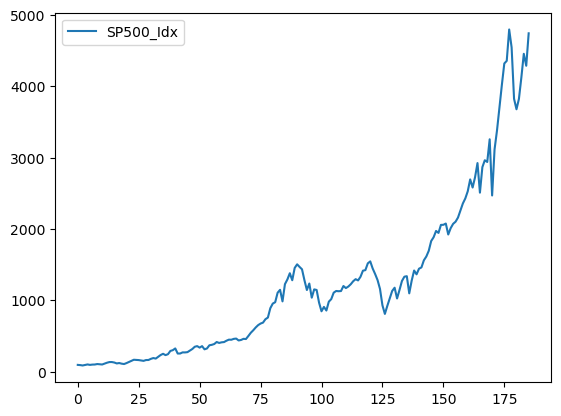

In [17]:
stock_quarter_df.plot()

In [18]:
stock_quarter_df['Quarter_Diff'] = stock_quarter_df.SP500_Idx.diff()
stock_quarter_df['Quarter_Shift'] = stock_quarter_df.SP500_Idx.shift()

In [800]:
stock_quarter_df['Quarter_Rate'] = stock_quarter_df['Quarter_Diff']/stock_quarter_df.Quarter_Shift

In [802]:
stock_quarter_df.head()

,Quarter,SP500_Idx,Quarter_Rate,Quarter_Diff,Quarter_Shift
0,1977-4,96.74,NaN,NaN,NaN
1,1978-1,93.82,-0.030,-2.92,96.74
2,1978-2,88.46,-0.057,-5.36,93.82
3,1978-3,95.09,0.075,6.63,88.46
4,1978-4,102.96,0.083,7.87,95.09


In [803]:
stock_quarter_df.Quarter_Rate.mean()

0.024567992852019032

In [804]:
stock_quarter_df.to_csv("stock_quarter_df.csv", index = False)

In [35]:
stock_quarter_df = pd.read_csv("stock_quarter_df.csv")

In [805]:
def getQuarterRate(df, rate = "Quarter_Rate"):
    
    '''aggregate daily to quarterly/annually rate '''
    df["Quarter"] = [str(i.year)+"-"+str(i.quarter) for i in df.Date]
    #df["Year"] = [str(i.year) for i in df.Date]
    
    quarterRate = {}
    for i in df.Quarter.unique():
        quarter_i = df[df.Quarter == i]
        quarterRate[i] = quarter_i.Close[quarter_i.Date == quarter_i.Date.min()].values[0] 
        
    quarterRate_df = pd.DataFrame([quarterRate]).T
    quarterRate_df.reset_index(inplace = True)
    quarterRate_df.columns = ["Quarter", rate]
    return quarterRate_df

# Your home work 1 assignment : get annual rate of SP500

# webscraping inflation data 
* https://www.usinflationcalculator.com/inflation/historical-inflation-rates/

In [806]:
import requests
import pandas as pd

url = 'https://www.usinflationcalculator.com/inflation/historical-inflation-rates/'
html = requests.get(url).content

In [807]:
html[:1000]

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#"> <!--<![endif]-->\r\n<head>\r\n    \r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://www.usinflationcalculator.com/xmlrpc.php" />\r\n    \n\t\t<!-- All in One SEO 4.5.3.1 - aioseo.com -->\r\n\t\t<link media="all" href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_033e845c37b40f37d78c828343722922.css" rel="stylesheet"><link media="screen" href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_b1b49ef44ac1c3bcefc487db23e4f7ca.css" rel="stylesheet"><title>Historical Inflation Rates: 1914-2024</title>\n\t\t<meta name="description" content="The table displays historical inflation rates with 

In [808]:
df_list = pd.read_html(html)[0]

In [809]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    111 non-null    int64  
 1   Jan     111 non-null    object 
 2   Feb     110 non-null    float64
 3   Mar     110 non-null    float64
 4   Apr     110 non-null    float64
 5   May     110 non-null    float64
 6   Jun     110 non-null    float64
 7   Jul     110 non-null    float64
 8   Aug     110 non-null    float64
 9   Sep     110 non-null    float64
 10  Oct     110 non-null    float64
 11  Nov     110 non-null    float64
 12  Dec     110 non-null    float64
 13  Ave     110 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 12.3+ KB


In [810]:
df_list.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
109,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1
110,2024,Avail. Feb. 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [811]:
df_list.iloc[-1]

Year              2024
Jan     Avail. Feb. 13
Feb                NaN
Mar                NaN
Apr                NaN
May                NaN
Jun                NaN
Jul                NaN
Aug                NaN
Sep                NaN
Oct                NaN
Nov                NaN
Dec                NaN
Ave                NaN
Name: 110, dtype: object

In [812]:
# drop last row
#df_list = df_list.iloc[:-1,:]
df_list = df_list[:-1]

In [813]:
df_list.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
109,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1


In [814]:
# convert "Jan" column to float
df_list.Jan = df_list.Jan.astype(float)

In [815]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    110 non-null    int64  
 1   Jan     110 non-null    float64
 2   Feb     110 non-null    float64
 3   Mar     110 non-null    float64
 4   Apr     110 non-null    float64
 5   May     110 non-null    float64
 6   Jun     110 non-null    float64
 7   Jul     110 non-null    float64
 8   Aug     110 non-null    float64
 9   Sep     110 non-null    float64
 10  Oct     110 non-null    float64
 11  Nov     110 non-null    float64
 12  Dec     110 non-null    float64
 13  Ave     110 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 12.2 KB


In [816]:
df_list["Q1"] = df_list[['Jan','Feb','Mar']].mean(axis = 1)

In [817]:
df_list.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Q1
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.333
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,0.667
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9,4.367
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4,14.067
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0,17.967


In [818]:
df_list["Q2"] = df_list[['Apr','May','Jun']].mean(axis = 1)
df_list["Q3"] = df_list[['Jul','Aug','Sep']].mean(axis = 1)
df_list["Q4"] = df_list[['Oct','Nov','Dec']].mean(axis = 1)

In [819]:
df_list.tail() #convert from wide to long format

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Q1,Q2,Q3,Q4
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8,1.667,1.800,1.733,2.067
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2,2.100,0.333,1.233,1.267
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7,1.900,4.867,5.367,6.667
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0,7.967,8.667,8.333,7.100
109,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1,5.800,3.967,3.533,3.233


### https://pandas.pydata.org/docs/reference/api/pandas.melt.html

* df.pivot() convert long to wide, not what we want.
* df.melt() convert wide to long, that is what we want.

In [820]:
inflation_out = df_list.melt(id_vars="Year", value_vars=['Q1','Q2','Q3','Q4'],
         value_name='Inflation', col_level=None, ignore_index=False).reset_index(drop = True)

In [821]:
inflation_out.tail()

,Year,variable,Inflation
435,2019,Q4,2.067
436,2020,Q4,1.267
437,2021,Q4,6.667
438,2022,Q4,7.100
439,2023,Q4,3.233


In [822]:
inflation_out.Inflation = inflation_out.Inflation/100

In [823]:
# create a quarter column list comprehension method
inflation_out["Quarter"]= [i[1] for i in inflation_out.variable]

In [824]:
inflation_out.tail()

,Year,variable,Inflation,Quarter
435,2019,Q4,0.021,4
436,2020,Q4,0.013,4
437,2021,Q4,0.067,4
438,2022,Q4,0.071,4
439,2023,Q4,0.032,4


In [825]:
inflation_out["Quarter"]= inflation_out.Year.astype(str) + "-" + inflation_out.Quarter

In [826]:
inflation_out.tail()

,Year,variable,Inflation,Quarter
435,2019,Q4,0.021,2019-4
436,2020,Q4,0.013,2020-4
437,2021,Q4,0.067,2021-4
438,2022,Q4,0.071,2022-4
439,2023,Q4,0.032,2023-4


In [827]:
inflation_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       440 non-null    int64  
 1   variable   440 non-null    object 
 2   Inflation  440 non-null    float64
 3   Quarter    440 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.9+ KB


In [828]:
inflation_out.to_csv('inflation_data.csv', index = False)

In [19]:
inflation_out = pd.read_csv('inflation_data.csv')

In [20]:
inflation_out.shape

(440, 4)

## Import other macroeconomic data - Dividend, Bond_Return, Bond_Income 

In [21]:
quarter_rate = pd.read_csv("Quarterly_Return.csv")

In [22]:
quarter_rate.head()

,Month_year,Dividend,Bond-Total,Bond-Income
0,3/31/1926,0.008723,0.024368,0.009221
1,6/30/1926,0.015456,0.012858,0.009135
2,9/30/1926,0.012531,0.004205,0.009296
3,12/31/1926,0.018409,0.034352,0.009143
4,3/31/1927,0.009731,0.042056,0.008612


In [ ]:
quarter_rate.Bond-Total #not a good idea "-", you can replace it with "_"
quarter_rate.Bond_Total 

<Axes: >

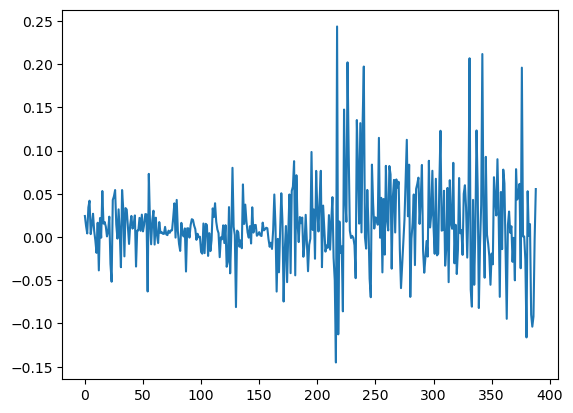

In [23]:
quarter_rate['Bond-Total'].plot()

In [831]:
# the index of "q_rate.Month_year" is a string, not a date
quarter_rate.Month_year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 389 entries, 0 to 388
Series name: Month_year
Non-Null Count  Dtype 
--------------  ----- 
389 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [28]:
#convert index to date
quarter_rate['Quarter_End'] = pd.to_datetime(quarter_rate.Month_year)

In [29]:
quarter_rate['Quarter'] = [i.quarter for i in quarter_rate['Quarter_End']]

In [30]:
quarter_rate['Year'] = [i.year for i in quarter_rate['Quarter_End']]

In [31]:
quarter_rate.tail()

,Month_year,Dividend,Bond-Total,Bond-Income,Quarter_End,Quarter,Year
384,3/31/2022,0.003618,-0.089716,0.005343,2022-03-31,1,2022
385,6/30/2022,0.003917,-0.103663,0.007727,2022-06-30,2,2022
386,9/30/2022,0.004049,-0.091893,0.008586,2022-09-30,3,2022
387,12/31/2022,0.004595,-0.002332,0.010484,2022-12-31,4,2022
388,3/31/2023,0.004462,0.055545,0.010075,2023-03-31,1,2023


In [32]:
#create a merg key
quarter_rate['Quarter'] = quarter_rate.Year.astype(str) + "-" + quarter_rate.Quarter.astype(str)

In [34]:
stock_quarter_df.columns

Index(['Quarter', 'SP500_Idx', 'Quarter_Diff', 'Quarter_Shift'], dtype='object')

In [36]:
quarter_all = pd.merge(pd.merge(stock_quarter_df[['Quarter', 'Quarter_Rate']],
                 inflation_out[['Inflation', 'Quarter']], on = "Quarter"), 
                 quarter_rate[['Dividend','Bond-Total','Bond-Income','Quarter']], on = "Quarter") 

In [38]:
quarter_all.rename(columns = {"Quarter_Rate":"Stock", 
                              "Bond-Total":"Bond",
                              "Bond-Income":"Income"}, inplace = True) 

In [41]:
quarter_all.head()

,Quarter,Stock,Inflation,Dividend,Bond,Income
1,1978-1,-0.030184,0.066000,0.013120,-0.009678,0.019950
2,1978-2,-0.057131,0.069667,0.013639,-0.012488,0.020906
3,1978-3,0.074949,0.079333,0.012688,0.025397,0.020960
4,1978-4,0.082764,0.089333,0.014036,-0.014526,0.021397
5,1979-1,-0.060509,0.097667,0.013508,0.018392,0.021984


In [40]:
quarter_all = quarter_all.iloc[1:, :]

In [840]:
# #drop the 1st row given the NA in Stock
# quarter_all.dropna(inplace = True)

In [841]:
quarter_all.head()

,Quarter,Stock,Inflation,Dividend,Bond,Income
1,1978-1,-0.030,0.066,0.013,-0.010,0.020
2,1978-2,-0.057,0.070,0.014,-0.012,0.021
3,1978-3,0.075,0.079,0.013,0.025,0.021
4,1978-4,0.083,0.089,0.014,-0.015,0.021
5,1979-1,-0.061,0.098,0.014,0.018,0.022


# deal with stationarity and autocorrelation

* test statinoarity of time series regarding trend and seasonality, 
* test autocorrelation of time series

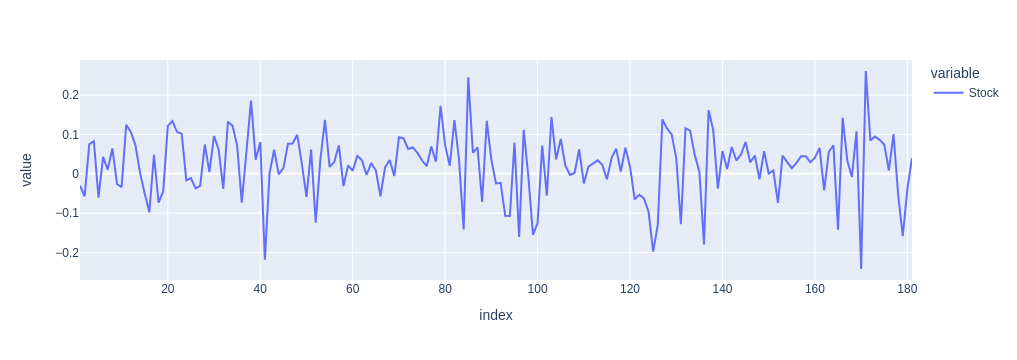

In [843]:
quarter_all.Stock.plot()

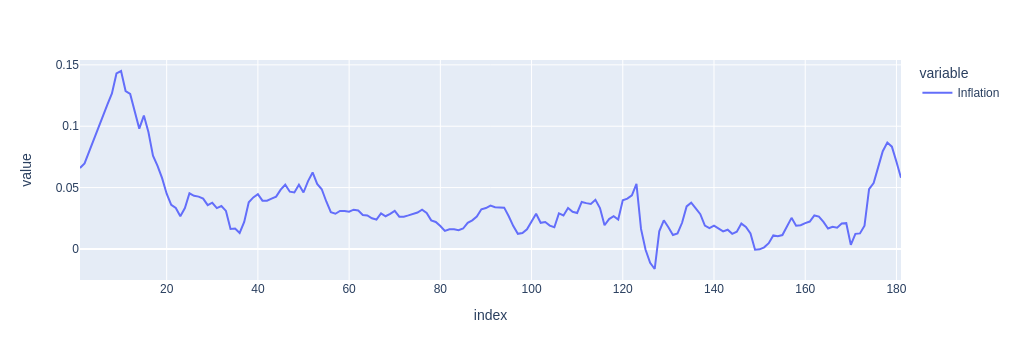

In [844]:
quarter_all.Inflation.plot()

In [845]:
# adfuller from statsmodels 
from statsmodels.tsa.stattools import adfuller

# KPSS test  vs  ADF test
* https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=What%20is%20the%20difference%20between,trend%20in%20the%20time%20series.

These is the return values of adfuller test 

* https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html#adfuller
* adfstat, pvalue, usedlag, nobs, critvalues, icbest

In [846]:
dftest = adfuller(quarter_all.Stock, autolag='AIC')
dftest[1]

2.4069860434594102e-25

In [847]:
def adf_test(series):
    #print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    #dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    # for key,value in dftest[4].items():
    #     dfoutput['Critical Value (%s)'%key] = value
    if dftest[1] >0.05:
        print (f"{series.name} is not stationary")
    else:
        print (f"{series.name} is stationary")

In [848]:
for i in quarter_all.columns[1:]:
    adf_test(quarter_all.loc[:,i])

Stock is stationary
Inflation is stationary
Dividend is not stationary
Bond is stationary
Income is not stationary


# conclusion: Stock, Bond, and Inflation time series are stationary

In [849]:
from statsmodels.stats.stattools import durbin_watson # test autocorrelation

In [850]:
for i in quarter_all.columns[1:]:
    ''' check is the DW test return a value between 1.5 and 2.5, 
         if yes, then no correlation, otherwise has correlation '''    
          
    print(i ,  durbin_watson(quarter_all.loc[:,i]))

Stock 1.8645147589029654
Inflation 0.03029835086824506
Dividend 0.006364113879805184
Bond 1.867738841819681
Income 0.004436889347253819


# conclusion: Stock and Bond time series have no correlation

# TEST: fit OLS model with Dependent Variable = yt and Independent Variable = yt-1

In [851]:
quarter_all.head()

,Quarter,Stock,Inflation,Dividend,Bond,Income
1,1978-1,-0.030,0.066,0.013,-0.010,0.020
2,1978-2,-0.057,0.070,0.014,-0.012,0.021
3,1978-3,0.075,0.079,0.013,0.025,0.021
4,1978-4,0.083,0.089,0.014,-0.015,0.021
5,1979-1,-0.061,0.098,0.014,0.018,0.022


In [46]:
for i in ['Dividend','Income', 'Inflation']:
    ''' use shift() to create lag(1) data '''
    quarter_all[f"{i}_lag"] = quarter_all[i].shift()

In [47]:
quarter_all.head()

,Quarter,Stock,Inflation,Dividend,Bond,Income,Dividend_lag,Income_lag,Inflation_lag
1,1978-1,-0.030184,0.066000,0.013120,-0.009678,0.019950,NaN,NaN,NaN
2,1978-2,-0.057131,0.069667,0.013639,-0.012488,0.020906,0.013120,0.019950,0.066000
3,1978-3,0.074949,0.079333,0.012688,0.025397,0.020960,0.013639,0.020906,0.069667
4,1978-4,0.082764,0.089333,0.014036,-0.014526,0.021397,0.012688,0.020960,0.079333
5,1979-1,-0.060509,0.097667,0.013508,0.018392,0.021984,0.014036,0.021397,0.089333


In [48]:
quarter_all.dropna(inplace = True)
quarter_all.head()

,Quarter,Stock,Inflation,Dividend,Bond,Income,Dividend_lag,Income_lag,Inflation_lag
2,1978-2,-0.057131,0.069667,0.013639,-0.012488,0.020906,0.013120,0.019950,0.066000
3,1978-3,0.074949,0.079333,0.012688,0.025397,0.020960,0.013639,0.020906,0.069667
4,1978-4,0.082764,0.089333,0.014036,-0.014526,0.021397,0.012688,0.020960,0.079333
5,1979-1,-0.060509,0.097667,0.013508,0.018392,0.021984,0.014036,0.021397,0.089333
6,1979-2,0.043110,0.107667,0.014156,0.046179,0.022595,0.013508,0.021984,0.097667


In [49]:
# #get correlation coefs of rates
# q_r_sub.iloc[:,[1,2,3,4,5]].corr()

<Axes: >

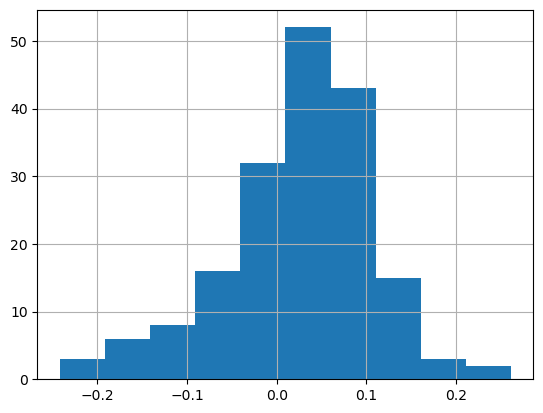

In [50]:
quarter_all.Stock.hist()

# fit individual Student t-distribution

* https://en.wikipedia.org/wiki/Student%27s_t-distribution
* When a t-distribution has a large number of degrees of freedom, it converges to a normal distribution
* A t-distribtion should be symmetric but not ncessarily center on zero.

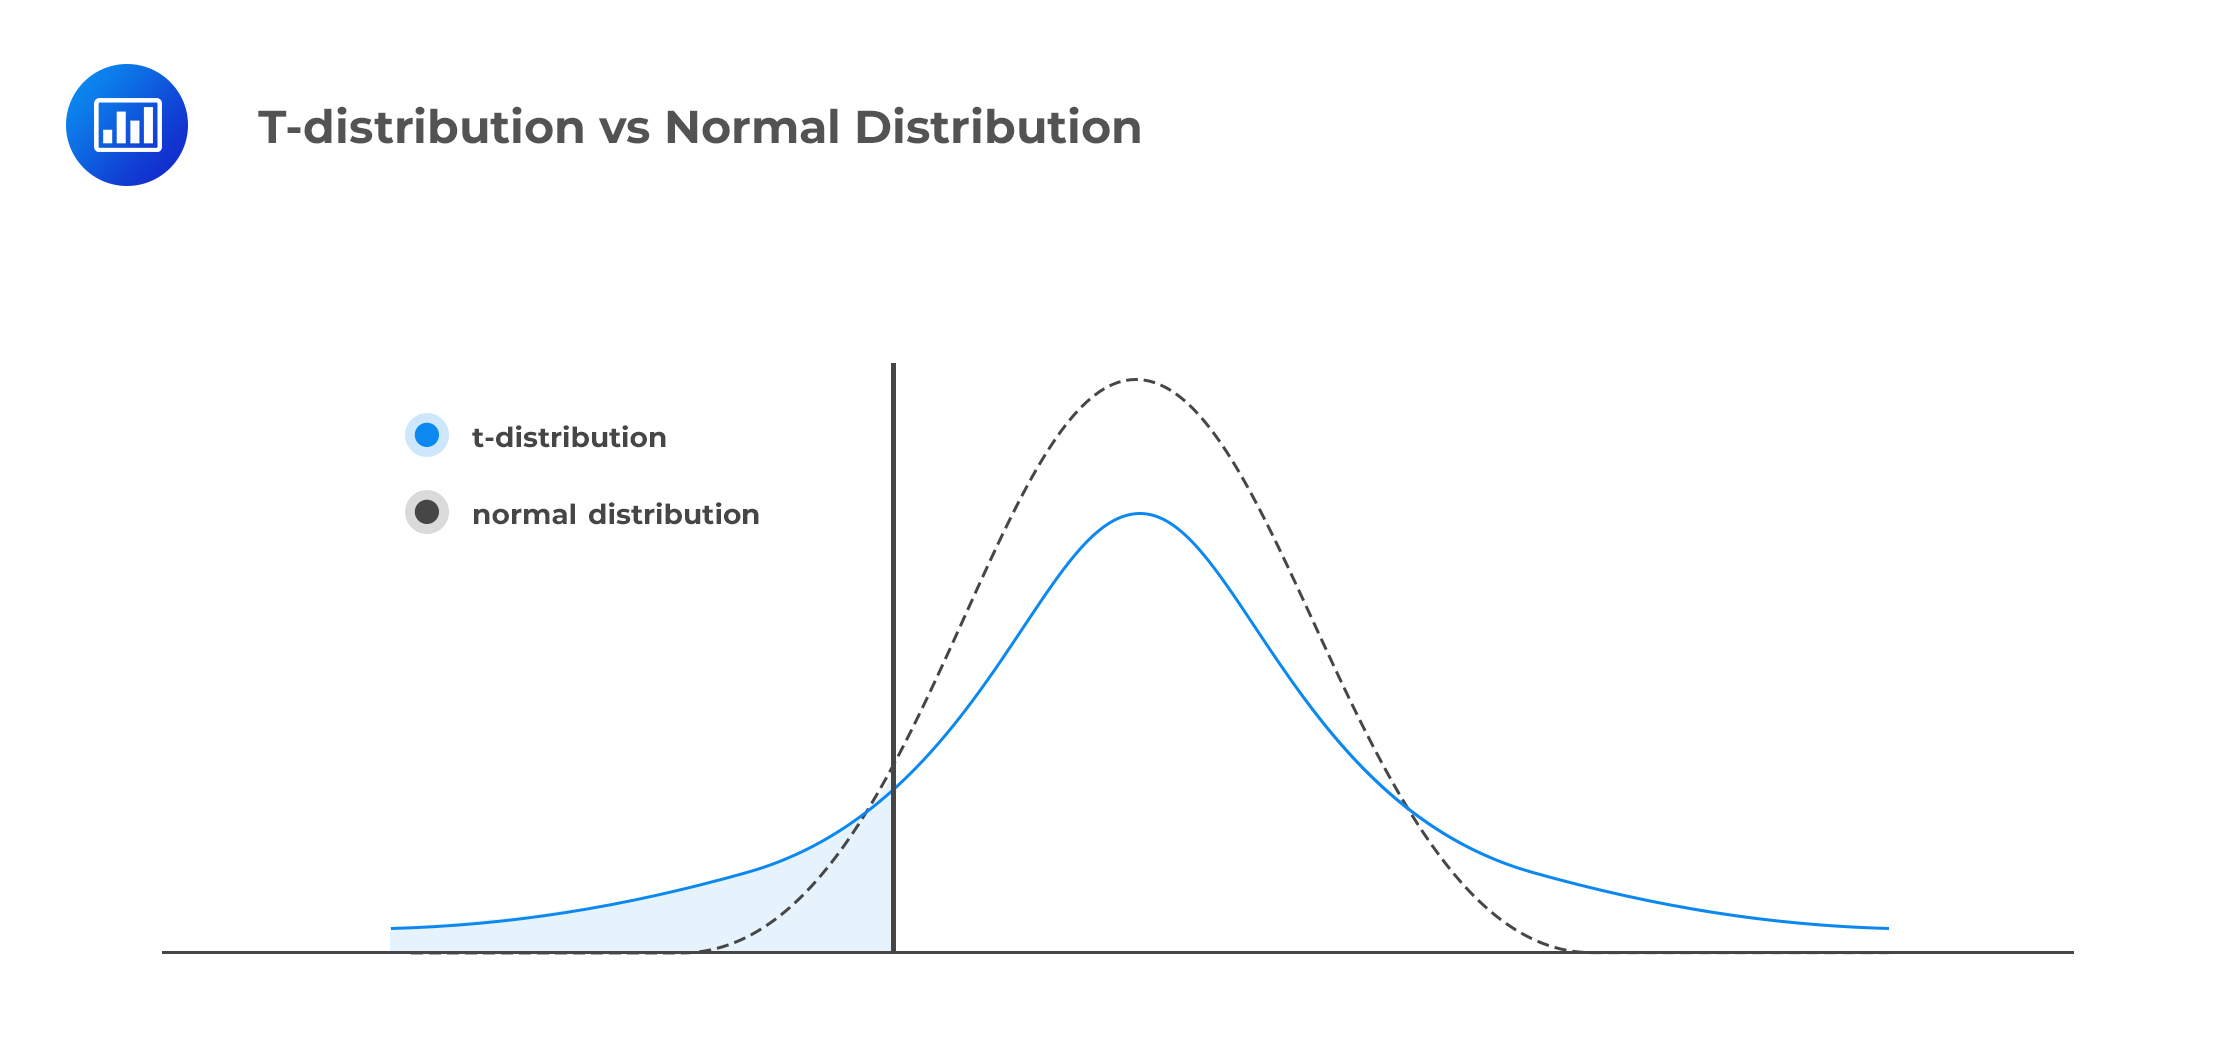

In [857]:
stats.t.fit(quarter_all['Stock']) #degree of freedom, mean(mu), sigma

(4.840521420952492, 0.03050952770739216, 0.06401327726418578)

# Stop here on 01/31/2024

# Run simulation on Time Series
* Dividend and Bond income are non-negative and they are autocorrelated
* Running forecasting into 35 years could end up with negative returns (try w/ ARIMA) thus it is not realistic
* Given the residuals of error term is randomly distributed around 0, we can simualte error term with fat-tailed t-distribution   

In [45]:
quarter_all.head()

,Quarter,Stock,Inflation,Dividend,Bond,Income
1,1978-1,-0.030184,0.066000,0.013120,-0.009678,0.019950
2,1978-2,-0.057131,0.069667,0.013639,-0.012488,0.020906
3,1978-3,0.074949,0.079333,0.012688,0.025397,0.020960
4,1978-4,0.082764,0.089333,0.014036,-0.014526,0.021397
5,1979-1,-0.060509,0.097667,0.013508,0.018392,0.021984


In [51]:
# X should be 2-D, even in this case, we only use 1 IV "Dividend_lag" 
dividend_fit_  = LinearRegression().fit(X = quarter_all[["Dividend_lag"]], y = quarter_all.Dividend)

In [52]:
direct_pred = dividend_fit_.predict(quarter_all[["Dividend_lag"]])

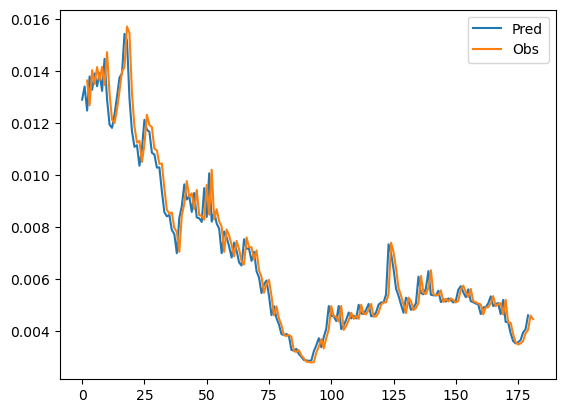

In [53]:
plt.plot(direct_pred, label = "Pred")
plt.plot(quarter_all.Dividend, label = "Obs")
plt.legend()
plt.show()

# To get better normal distribution, let us transformed the data by taking logrithm on both IV and DV. 

<Axes: >

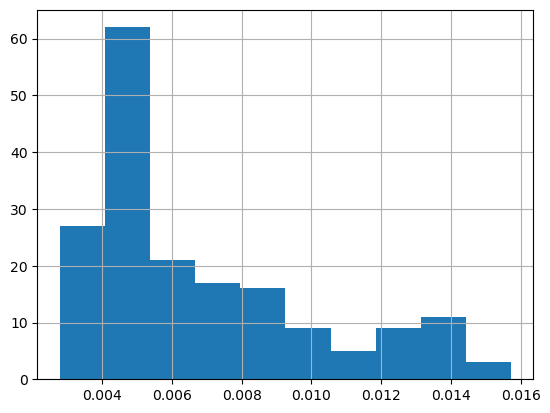

In [54]:
quarter_all.Dividend.hist()

In [55]:
div_log = np.log(quarter_all.Dividend)
div_lag_log = np.log(quarter_all.Dividend_lag)

<Axes: >

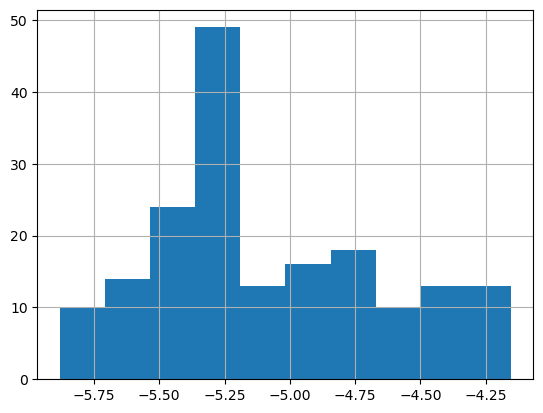

In [56]:
div_log.hist()

In [58]:
dividend_fit = LinearRegression().fit(pd.DataFrame(div_lag_log), div_log)
print(f"intercept: {dividend_fit.intercept_}; coef_: {dividend_fit.coef_}")

intercept: -0.12878526076420904; coef_: [0.97581288]


In [60]:
# collect errors or "residuals" 
dividend_error = div_log - dividend_fit.predict(pd.DataFrame(div_lag_log))

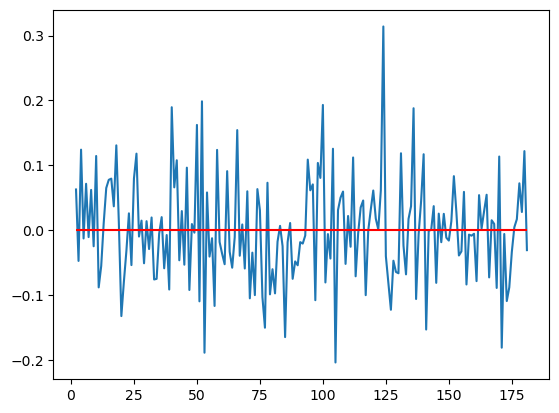

In [61]:
plt.plot(dividend_error)
plt.hlines(y = 0, xmin = dividend_error.index.min(), xmax = dividend_error.index.max(),
           color = "red")

In [866]:
stats.t.fit(dividend_error) 
stats.t.fit(dividend_error) 

(10.774364057238037, -0.0018563351675061767, 0.07243325996061858)

## fit bond income distribution *** bond data has autocorelation issue ***

In [63]:
income_log = np.log(quarter_all['Income'])
income_lag_log = np.log(quarter_all['Income_lag'])

In [64]:
income_fit = LinearRegression().fit(pd.DataFrame(income_lag_log), income_log)
print(f"intercept: {income_fit.intercept_}; coef_: {income_fit.coef_}")

intercept: -0.07290947656719915; coef_: [0.98396951]


In [65]:
income_error = income_log - income_fit.predict(pd.DataFrame(income_lag_log))

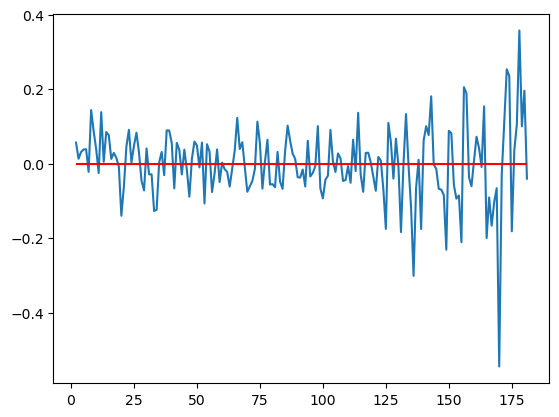

In [66]:
plt.plot(income_error)
plt.hlines(y = 0, xmin = income_error.index.min(), xmax = income_error.index.max(),
           color = "red")

# fit inflation distribution

<Axes: >

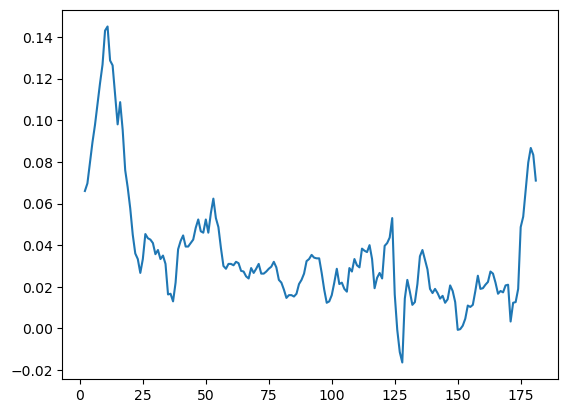

In [68]:
quarter_all.Inflation_lag.plot()

In [69]:
inflation_fit = LinearRegression().fit(quarter_all[['Inflation_lag']], quarter_all.Inflation)
print(f"intercept: {inflation_fit.intercept_}; coef_: {inflation_fit.coef_}")

intercept: 0.0014695790927438598; coef_: [0.95795028]


In [70]:
inflation_error = quarter_all.Inflation - inflation_fit.predict(quarter_all[['Inflation_lag']])

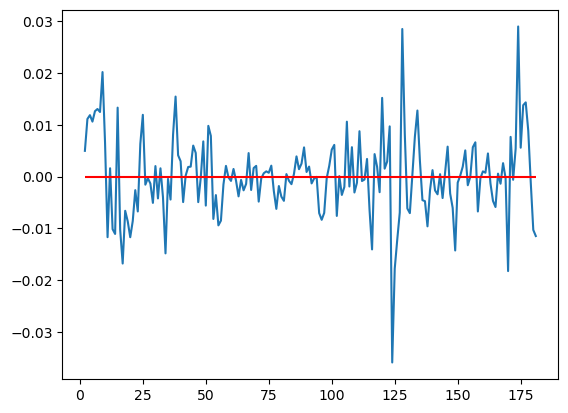

In [71]:
plt.plot(inflation_error)
plt.hlines(y = 0, xmin = inflation_error.index.min(), xmax = inflation_error.index.max(),
           color = "red")

In [72]:
pickle.dump((income_fit, dividend_fit, inflation_fit), open("fits.pkl", "wb"))

In [875]:
#(income_fit, dividend_fit, inflation_fit) = pickle.load(open("fits.pkl", "rb"))

# simulate Dividend and Bond_Income errors

In [73]:
pickle.dump((income_error, dividend_error, inflation_error), open("errors.pkl", "wb"))

In [74]:
(income_error, dividend_error, inflation_error) = pickle.load(open("errors.pkl", "rb"))

# fit t-distribution on 5 matrices

In [75]:
error_df = pd.concat([quarter_all['Stock'], pd.Series(income_error), 
                      pd.Series(dividend_error), pd.Series(inflation_error),
                      quarter_all['Bond']], axis = 1)                      

In [77]:
error_df.shape

(180, 5)

In [880]:
stats.t.fit(quarter_all['Stock']) #the mu of fit distribution is 0.0315 above 2X of observed mean

(4.840521420952492, 0.03050952770739216, 0.06401327726418578)

In [881]:
quarter_all['Stock'].mean()

0.024155564193107857

In [83]:
#fit t-distribution with the mean as location for stock and bond returns
stats.t.fit(quarter_all.Stock) 

(4.840521420952492, 0.03050952770739216, 0.06401327726418578)

<Axes: >

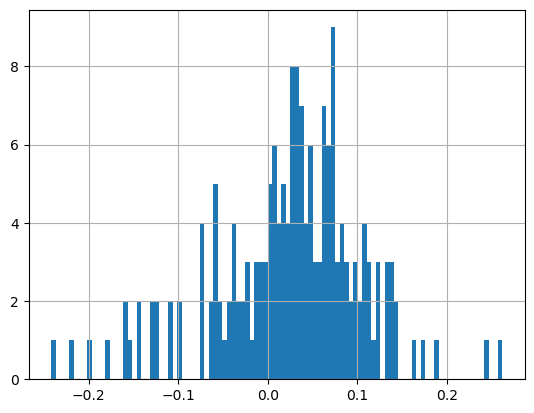

In [87]:
quarter_all.Stock.hist(bins = 100)

In [84]:
stock_para =  stats.t.fit(quarter_all.Stock, floc= quarter_all.Stock.mean())

In [85]:
stats.t.fit(quarter_all.Stock, floc= quarter_all.Stock.mean())

(5.7381129664114, 0.02415556419310784, 0.06648927369367667)

In [86]:
# pull 10K random samples from fit t-distribution
t_spl = stats.t.rvs(5.7381129664114, 0.02415556419310784, 0.06648927369367667, size = 10000)

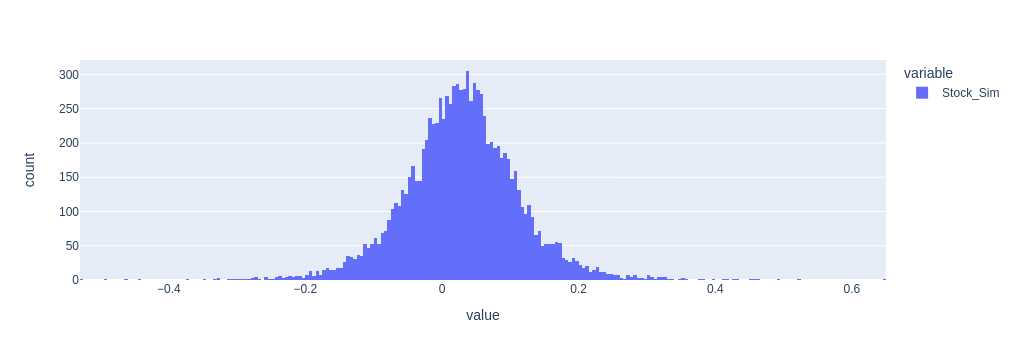

In [886]:
pd.Series(t_spl, name = "Stock_Sim").hist(bins = 50)

In [78]:
income_para = stats.t.fit(income_error)
dividend_para = stats.t.fit(dividend_error)
inflation_para = stats.t.fit(inflation_error)
bond_para = stats.t.fit(quarter_all.Bond, floc= quarter_all.Bond.mean())

# fit t-Copula : t-distribitions with dependency

* https://en.wikipedia.org/wiki/Copula_(probability_theory)

In [88]:
#degree of freedom for StudentTCopula()
df = np.mean([stock_para[0], income_para[0], dividend_para[0], inflation_para[0], bond_para[0]])
df

5.877313713795959

In [89]:
stock_para

(5.7381129664114, 0.02415556419310784, 0.06648927369367667)

In [90]:
# get mariginal t-distributions parameters : stock, income, dividend, inflation, and bond
marginal_lst = [stats.t(5.7381129664114, 0.024155564193107857, 0.06648927369367667),
                stats.t(3.76097740735632, 0.00158622386989215, 0.06774723566090496),
                stats.t(10.774364057238037, -0.0018563351675061767, 0.07243325996061858),
                stats.t(3.73873079131897, -0.00019445668539148299, 0.005602295516441695),
                stats.t(5.374383346655071, 0.02015460131111111, 0.05098220486192172)]      

# optimized df of StudentTCopula

In [94]:
dfs = [stock_para[0], income_para[0], dividend_para[0], inflation_para[0], bond_para[0]]

In [95]:
df_min = round(min(dfs), 2); df_max = round(max(dfs), 2)
print(df_min, df_max)

3.74 10.77


In [96]:
error_df.shape

(180, 5)

In [92]:
corr_ = np.array(error_df.corr())
corr_

array([[ 1.        ,  0.20933319, -0.52194044,  0.17489273, -0.03307278],
       [ 0.20933319,  1.        ,  0.01617692,  0.35680599, -0.28908415],
       [-0.52194044,  0.01617692,  1.        , -0.08020746,  0.1788387 ],
       [ 0.17489273,  0.35680599, -0.08020746,  1.        , -0.23232993],
       [-0.03307278, -0.28908415,  0.1788387 , -0.23232993,  1.        ]])

In [97]:
corr_abs_diff = {}
for i in tqdm(np.arange(df_min, df_max, 0.2)):
    sc_i = StudentTCopula(corr = corr_, df = i, k_dim=5)
    joint_dist = CopulaDistribution(copula=sc_i, marginals= marginal_lst) 
    sc_spl_i = joint_dist.rvs(50000, random_state = 1234)
    corr_i = np.array(pd.DataFrame(sc_spl_i).corr())
    corr_abs_diff[i] = abs(corr_[np.triu(np.ones_like(corr_)) == 0] - \
                           corr_i[np.triu(np.ones_like(corr_)) == 0]).sum()             

100%|███████████████████████████████████████████| 36/36 [00:21<00:00,  1.68it/s]


In [98]:
df_min = min(corr_abs_diff, key = corr_abs_diff.get)
df_min

10.140000000000006

In [897]:
print(df_min)

10.140000000000006


In [898]:
#define 5 t-distribution Copula
sc = StudentTCopula(corr = np.array(error_df.corr()), df = df_min, k_dim=5)

In [899]:
# copula model
joint_dist = CopulaDistribution(copula=sc, marginals= marginal_lst) 

## Check correlation of simulated Linear Rregression errors 

In [106]:
# y(t) = beta_0 + beta_1 * y(t-1) + error

In [103]:
beta_0 =  income_fit.intercept_; 
beta_1 = income_fit.coef_

In [104]:
beta_0

-0.07290947656719915

In [105]:
beta_1

array([0.98396951])

In [122]:
def getSim(y, ar_model, error, type = "non_log"):
    '''get simulation of autocorrealtion data with simulated LR error term'''    
 
    sim_init = y[y.index.max()]
    sim_out = ar_model.intercept_ + ar_model.coef_[0] * sim_init + error   

    if type == "log":
        sim_out = np.exp(sim_out)
        return sim_out
    else:
        return sim_out        

In [107]:
a  = 10
np.log(10)

2.302585092994046

In [108]:
np.exp(np.log(10))

10.000000000000002

# test scenarios 2 and 6

In [109]:
#read quarterly RMD
rmd_quarter = pd.read_csv("rmd_quarter_rate.csv")

In [111]:
rmd_quarter.tail()

,Age,Quarterly_Rate
184,118.00,0.100000
185,118.25,0.100000
186,118.50,0.100000
187,118.75,0.100000
188,119.00,0.108696


In [112]:
rmd_quarter["RMD0"] = rmd_quarter.Quarterly_Rate * 0.8

In [113]:
rmd_quarter["RMD1"] = rmd_quarter.Quarterly_Rate * 1.0

In [114]:
rmd_quarter["RMD2"] = rmd_quarter.Quarterly_Rate * 1.2

In [115]:
rmd_quarter.head()

,Age,Quarterly_Rate,RMD0,RMD1,RMD2
0,72.00,0.009124,0.007299,0.009124,0.010949
1,72.25,0.009124,0.007299,0.009124,0.010949
2,72.50,0.009124,0.007299,0.009124,0.010949
3,72.75,0.009124,0.007299,0.009124,0.010949
4,73.00,0.009434,0.007547,0.009434,0.011321


In [123]:
def method_quarterly(org_amt, rmd_quarter, start_age, end_age, stock_bond_sim_df, 
                       stock_weight, bond_weight, rmd_col):
    
    balance = [] 
    withdrawal = [] 
    org_left = org_amt

    rmd_sub = rmd_quarter.loc[(rmd_quarter.Age >= start_age) & (rmd_quarter.Age <= end_age)]
    rmd_sub.index = list(np.arange(start_age, end_age+0.1, 0.25))

    for i in np.arange(start_age, end_age+0.1, 0.25):
        
        if i == start_age:
            '''withdraw RMD % initial balance at the retirement moment''' 
            withdrawal_ = org_left * (rmd_sub[rmd_col][i] \
                           + stock_weight * stock_bond_sim_df.Dividend[i] \
                                 + bond_weight * stock_bond_sim_df.Income[i])
            
            withdrawal.append(withdrawal_)
            
            org_left =  (org_left - withdrawal_)                   
            balance.append(org_left)              

        else:            
            '''for the following quarters, the left balance will grow with total bond and total stock 
            returns before next quarterly withdrawal'''            
            grow_left =  org_left * (1 + bond_weight * stock_bond_sim_df.Bond[i] \
                                   + stock_weight * stock_bond_sim_df.Stock[i])

            withdrawal_ = grow_left * rmd_sub[rmd_col][i] \
                          + org_left * (stock_weight * stock_bond_sim_df.Dividend[i] \
                                        + bond_weight * stock_bond_sim_df.Income[i])
              
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ >= grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_)             

    return balance, withdrawal

In [124]:
def sim_10K_quarterly(org_amt, withdrawal_rate, start_age, end_age, 
            output_balance_path, output_withdrawal_path, sim_out = False):
    
    global joint_dist, quarter_all, rmd_quarter, bond_weight, stock_weight, income_fit, dividend_fit, inflation_fit
    
    '''1) withdrawal_rate is only for method 6
       2) Two types of rmd are used only for method 2 and 3
    '''
    
    print(f'org_amt = {org_amt}; quarterly withdrawal rate = {withdrawal_rate}')
    print(f'Output pickle files are {output_balance_path} and {output_withdrawal_path}.\n')
    
    balance_2_0_1_1 = {}
    balance_2_0_1_2 = {}
    balance_2_0_1_3 = {}
    
    withdrawal_2_0_1_1 = {}
    withdrawal_2_0_1_2 = {}
    withdrawal_2_0_1_3 = {}
    
    quarters = np.arange(start_age, end_age+0.1, 0.25)   
    print(len(quarters))
    
    sim_dict = {}
    for i in tqdm(range(10000)):
        
        '''simulate 10K of autocorrelated quarterly data start with the last observed autocorrelaton data'''
        
        stock_bond_sim_df = pd.DataFrame(joint_dist.rvs(len(quarters), random_state = i))                
        stock_bond_sim_df.index = list(quarters)
        stock_bond_sim_df.columns = ['Stock', 'Income','Dividend','Inflation','Bond']
        
        stock_bond_sim_df['Income'] = getSim(np.log(quarter_all['Bond']), 
                                             income_fit, stock_bond_sim_df.Income, type = "log")
        
        stock_bond_sim_df['Dividend'] = getSim(np.log(quarter_all.Dividend), 
                                             dividend_fit, stock_bond_sim_df.Dividend, type = "log")
        
        stock_bond_sim_df['Inflation'] = getSim(quarter_all.Inflation, 
                                            inflation_fit, stock_bond_sim_df.Inflation, type = "non_log")
        
        sim_dict[i] = stock_bond_sim_df

        balance_2_0_1_1[i], withdrawal_2_0_1_1[i] = method_quarterly(org_amt,rmd_quarter,start_age, end_age, 
                                                      stock_bond_sim_df, stock_weight, bond_weight, rmd_col = "RMD0")
        balance_2_0_1_2[i], withdrawal_2_0_1_2[i] = method_quarterly(org_amt,rmd_quarter,start_age, end_age, 
                                                      stock_bond_sim_df, stock_weight, bond_weight, rmd_col = "RMD1")
        balance_2_0_1_3[i], withdrawal_2_0_1_3[i] = method_quarterly(org_amt,rmd_quarter,start_age, end_age, 
                                                      stock_bond_sim_df, stock_weight, bond_weight, rmd_col = "RMD2")

        
    pickle.dump((balance_2_0_1_1, balance_2_0_1_2, balance_2_0_1_3),                   
                open(f"{output_balance_path}", "wb")) 
   
    pickle.dump((withdrawal_2_0_1_1, withdrawal_2_0_1_2, withdrawal_2_0_1_3),
            open(f"{output_withdrawal_path}", "wb")) 
    
    if sim_out == True:
        return sim_dict

In [125]:
org_amt = 255200
bond_weight = .6
stock_weight = .4
withdrawal_rate = 0.06

In [126]:
#get 10K iteration outputs
sim_dict = sim_10K_quarterly(org_amt, withdrawal_rate, 72, 100, 
                "./balance_quarterly_stock.pkl", 
                "./withdrawal_quarterly_stock.pkl", sim_out = True)

org_amt = 255200; quarterly withdrawal rate = 0.06
Output pickle files are ./balance_quarterly_stock.pkl and ./withdrawal_quarterly_stock.pkl.

113


100%|█████████████████████████████████████| 10000/10000 [02:12<00:00, 75.55it/s]


In [1007]:
#sim_dict[0].to_csv("rates.csv", index = False)
sim_dict[0].head()

,Stock,Income,Dividend,Inflation,Bond
72.00,0.019,0.055,0.004,0.055,0.009
72.25,0.059,0.055,0.004,0.058,-0.014
72.50,-0.015,0.052,0.004,0.051,0.015
72.75,0.174,0.059,0.005,0.025,0.056
73.00,0.006,0.049,0.005,0.051,0.064


In [1008]:
sim_dict[0].mean(axis = 0)

Stock        0.026
Income       0.055
Dividend     0.005
Inflation    0.058
Bond         0.033
dtype: float64

In [1009]:
#pickle.dump(annual_ret, open("annual_ret.pkl", "wb"))
pickle.dump(sim_dict, open("sim_dict.pkl", "wb"))

# export to csv

In [1010]:
def merge_df_quarterly(input_path):
    
    '''merge balance and withdrawal side-by-side by age'''
    # # Create a new directory because it does not exist
    # is_output_path = os.path.exists(output_path)
    # if not is_output_path:
    #     os.mkdir(output_path)
    
    file_lst = os.listdir(input_path)
    file_lst.sort()
    file_lst = [i for i in file_lst if i != '.ipynb_checkpoints']
    print(f"The # of files in destination is {len(file_lst)}")
    #assert len(file_lst) == 72, "The input files # is more than 72."
    #assert len(file_lst) == 12, "The # of csv files is more than 12"
    
    file_len = int(len(file_lst)/2)
    
    for i in range(file_len):
        bal_i = pd.read_csv(f'{input_path}/{file_lst[i]}')
        wdrl_i = pd.read_csv(f'{input_path}/{file_lst[i+file_len]}')
    
        out_i = pd.concat([bal_i, wdrl_i], axis = 1)
        out_i.columns = ["balance" + str(i) for i in np.arange(72, 100.1, 0.25)] + \
                        ["withdrawal" + str(i) for i in np.arange(72, 100.1, 0.25)]
        
        out_i_col = out_i.columns
        #out_i = out_i[[i for sub_i in [[out_i_col[i]] + [out_i_col[i+36]] for i in range(36)] for i in sub_i]]
        out_i.to_csv(f"{input_path}/method_{file_lst[i]}", index = False)  

In [1011]:
def export_csv_quarterly_stock(input_bal_path, input_wdrl_path, output_csv_path):
    
    is_output_path = os.path.exists(output_csv_path)
    if not is_output_path:
        os.mkdir(output_csv_path)

    (bal_2_0_1_1, bal_2_0_1_2, bal_2_0_1_3) \
             = pickle.load(open(f"{input_bal_path}", "rb"))
    
    (wdrl_2_0_1_1, wdrl_2_0_1_2, wdrl_2_0_1_3) \
             = pickle.load(open(f"{input_wdrl_path}", "rb"))
        
    export_lst = ['bal_2_0_1_1', 'wdrl_2_0_1_1', 
                  'bal_2_0_1_2', 'wdrl_2_0_1_2',
                  'bal_2_0_1_3', 'wdrl_2_0_1_3']
    
    for idx, _dict in enumerate((bal_2_0_1_1, wdrl_2_0_1_1,
                                 bal_2_0_1_2, wdrl_2_0_1_2,
                                 bal_2_0_1_3, wdrl_2_0_1_3)):        
        
        bal_i = pd.DataFrame.from_dict(_dict, orient = "index", columns = list(np.arange(72, 100.1, 0.25)))
        bal_i.to_csv(f"{output_csv_path}/{export_lst[idx]}.csv", index = False) 

# run 10K simulations on General settings

In [1012]:
export_csv_quarterly_stock("./balance_quarterly_stock.pkl", "./withdrawal_quarterly_stock.pkl",
                     "./outputs_quarterly_stock/")

In [1013]:
merge_df_quarterly("./outputs_quarterly_stock")

The # of files in destination is 6


# Concat median by age and plot

In [128]:
def prep_plot(pkl, col_name = 'method'):
    
    (method_2_0_1, method_2_0_1_1, method_6_0_1) = pickle.load(open(pkl, "rb"))   

    method_median = pd.Series(list(np.arange(72, 100.1, 0.25)), name = "Age")
    method_median.index = [j for j in np.arange(72, 100.1, 0.25)]
    
    for i in tqdm((method_2_0_1, method_2_0_1_1, method_6_0_1)):
        df_i = pd.DataFrame.from_dict(i, orient = "index", columns = list(np.arange(72, 100.1, 0.25)))
    
        #concate by columns   
        method_median = pd.concat([method_median, df_i.median(axis =0)], axis = 1)
    
    method_median.columns = ['Age',f'{col_name}_RMD_0.8', f'{col_name}_RMD_1.0',                               
                             f'{col_name}_RMD_1.2']
    
    return method_median

In [129]:
withdrawal_median_stock = prep_plot('withdrawal_quarterly_stock.pkl', col_name = 'Withdrawal')    

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.73it/s]


In [131]:
withdrawal_median_stock.tail()

,Age,Withdrawal_RMD_0.8,Withdrawal_RMD_1.0,Withdrawal_RMD_1.2
99.00,99.00,708.266979,527.624177,388.122567
99.25,99.25,676.724955,500.210470,365.434915
99.50,99.50,647.957229,475.149704,344.258737
99.75,99.75,618.127429,450.265652,323.427852
100.00,100.00,609.508898,441.677540,315.896910


# get interactive quarterly withdrawal

In [133]:
pd.options.plotting.backend = "plotly"

fig = withdrawal_median_stock.iloc[:,range(1, len(withdrawal_median_stock.columns))].plot()
fig.update_layout(legend=dict(title="Quarterly Withdrawal with Scenarios")) 
plotly.offline.plot(fig, filename='./Quarterly_withdrawal.html')

'./Quarterly_withdrawal.html'

In [134]:
bal_median_stock = prep_plot('balance_quarterly_stock.pkl', col_name = 'Balance')    

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.80it/s]


In [135]:
pd.options.plotting.backend = "plotly"

fig = bal_median_stock.iloc[:,range(1, len(bal_median_stock.columns))].plot()
fig.update_layout(legend=dict(title="Balance with Scenarios")) 
plotly.offline.plot(fig, filename='./Quarterly_balance_general.html')

'./Quarterly_balance_general.html'

In [1028]:
bal_median_stock.tail()

,Age,Balance_RMD_0.8,Balance_RMD_1.0,Balance_RMD_1.2
99.00,99.00,10517.036,6965.573,4604.939
99.25,99.25,10059.740,6609.227,4334.046
99.50,99.50,9571.190,6239.910,4060.003
99.75,99.75,9164.433,5927.852,3826.437
100.00,100.00,8759.394,5618.075,3596.230


# get interactive quarterly balance

In [1029]:
pd.options.plotting.backend = "plotly"

fig = bal_median_stock.iloc[:,range(1, len(bal_median_stock.columns))].plot()
fig.update_layout(legend=dict(title="Median Quarterly Balance of Scenarios")) 
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.8,
    xanchor="left",
    x=0.01
))
plotly.offline.plot(fig, filename='./Quarterly_balance.html')

'./Quarterly_balance.html'

# Conlcusuions:
* prepare data from public source
* aggreate data from daily to quarterly data
* run stationarity and autocorrealtion tests
* fit t-distribtion of data/error 
* simulate 10K times to get quarterly withdrawal and balance
* plot quarterly withdrawal and balance

# Your expectation:
    1) HW assigment - convert quarterly rates to annual rates and save as csv file and upload to Canvas
    2) Announce the term project